In [2]:
# import the necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv('hepsiemlak.csv')

In [4]:
# show the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8098 non-null   object
 1   city          8105 non-null   object
 2   district      8105 non-null   object
 3   neighborhood  8105 non-null   object
 4   room          8105 non-null   int64 
 5   salon         8105 non-null   int64 
 6   area          8105 non-null   int64 
 7   age           8105 non-null   int64 
 8   floor         8105 non-null   int64 
 9   price         8105 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 633.3+ KB
None


In [5]:
# drop the 'title' column
try:
    df.drop('title', axis=1, inplace=True)
except:
    pass

In [6]:
# set the type of the columns
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['salon'] = df['salon'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          8105 non-null   category
 1   district      8105 non-null   category
 2   neighborhood  8105 non-null   category
 3   room          8105 non-null   int64   
 4   salon         8105 non-null   int64   
 5   area          8105 non-null   int64   
 6   age           8105 non-null   int64   
 7   floor         8105 non-null   int64   
 8   price         8105 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 436.4 KB
None


In [14]:
# calculate the quartiles to detect the outliers for the 'room', 'salon', 'area', 'age', 'floor' and 'price' columns
columns = ['room', 'salon', 'area', 'age', 'floor', 'price']
min_values = []
max_values = []
for column in columns:
    print('column:', column)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print('Q1:', Q1)
    print('Q3:', Q3)
    print('IQR:', IQR)
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    print('min_value:', min_value)
    print('max_value:', max_value)
    min_values.append(min_value)
    max_values.append(max_value)

column: room
Q1: 2.0
Q3: 3.0
IQR: 1.0
min_value: 0.5
max_value: 4.5
column: salon
Q1: 1.0
Q3: 1.0
IQR: 0.0
min_value: 1.0
max_value: 1.0
column: area
Q1: 72.0
Q3: 135.0
IQR: 63.0
min_value: -22.5
max_value: 229.5
column: age
Q1: 4.0
Q3: 20.0
IQR: 16.0
min_value: -20.0
max_value: 44.0
column: floor
Q1: 1.0
Q3: 3.0
IQR: 2.0
min_value: -2.0
max_value: 6.0
column: price
Q1: 11000.0
Q3: 22500.0
IQR: 11500.0
min_value: -6250.0
max_value: 39750.0


In [15]:
# remove the outliers
for i, column in enumerate(columns):
    df = df[(df[column] >= min_values[i]) & (df[column] <= max_values[i])]

In [16]:
# show the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5839 entries, 0 to 8103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          5839 non-null   category
 1   district      5839 non-null   category
 2   neighborhood  5839 non-null   category
 3   room          5839 non-null   int64   
 4   salon         5839 non-null   int64   
 5   area          5839 non-null   int64   
 6   age           5839 non-null   int64   
 7   floor         5839 non-null   int64   
 8   price         5839 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 366.8 KB
None


In [17]:
# see some statistics of the dataset
print(df.describe())

              room   salon         area          age        floor  \
count  5839.000000  5839.0  5839.000000  5839.000000  5839.000000   
mean      2.143004     1.0   102.502312    12.728378     2.385511   
std       0.817712     0.0    37.983029    10.508102     1.560431   
min       1.000000     1.0     5.000000     0.000000    -2.000000   
25%       2.000000     1.0    70.000000     4.000000     1.000000   
50%       2.000000     1.0   100.000000    10.000000     2.000000   
75%       3.000000     1.0   130.000000    20.000000     3.000000   
max       4.000000     1.0   228.000000    44.000000     6.000000   

              price  
count   5839.000000  
mean   16015.663984  
std     7347.160615  
min        1.000000  
25%    10950.000000  
50%    15000.000000  
75%    20000.000000  
max    39500.000000  


array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'salon'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

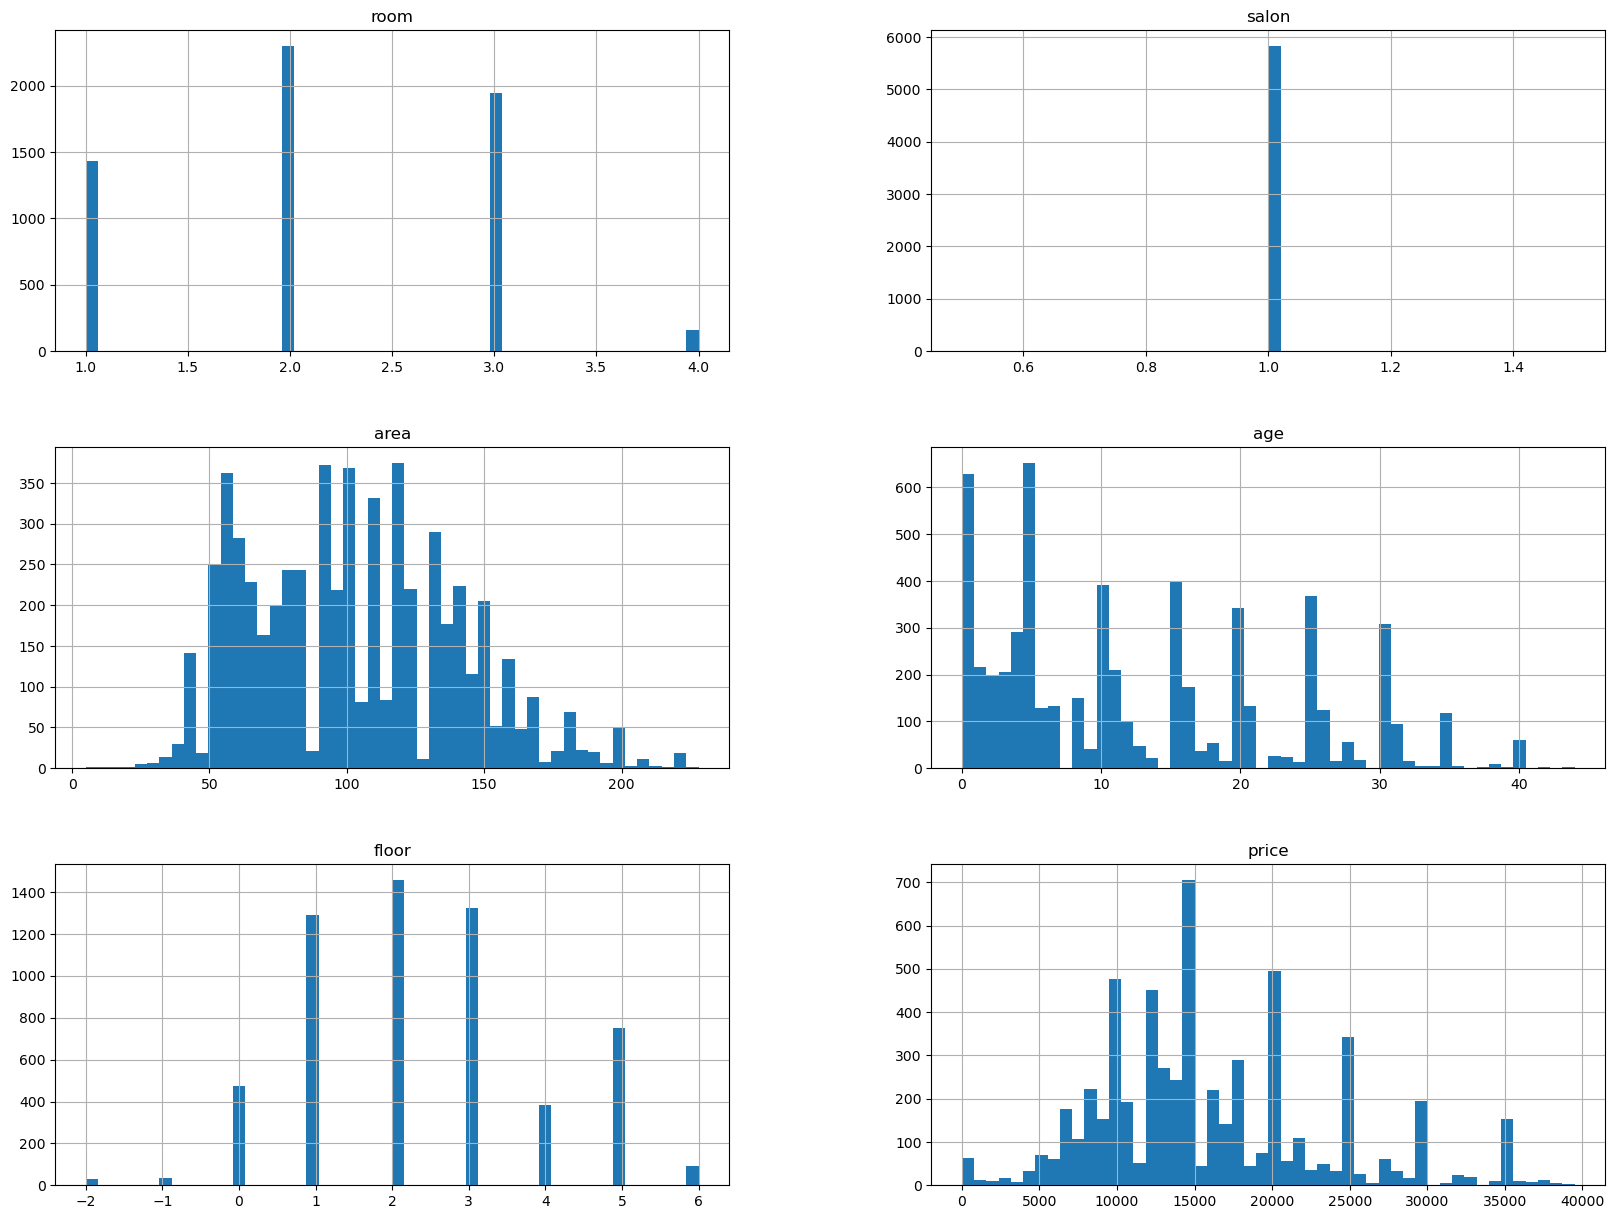

In [18]:
# plot the histograms of the columns
df.hist(bins=50, figsize=(20, 15))

In [19]:
# an extra fix for the 'price' column
df = df[df['price'] >= 3000]

In [20]:
# see the information and statistics of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5743 entries, 23 to 8103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          5743 non-null   category
 1   district      5743 non-null   category
 2   neighborhood  5743 non-null   category
 3   room          5743 non-null   int64   
 4   salon         5743 non-null   int64   
 5   area          5743 non-null   int64   
 6   age           5743 non-null   int64   
 7   floor         5743 non-null   int64   
 8   price         5743 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 361.2 KB
None
              room   salon         area          age        floor  \
count  5743.000000  5743.0  5743.000000  5743.000000  5743.000000   
mean      2.146439     1.0   102.637646    12.776772     2.385687   
std       0.817333     0.0    37.994905    10.523330     1.559273   
min       1.000000     1.0     5.000000     0.000000    -2.000000   
25%       2

In [21]:
# save the cleaned dataset
df.to_csv('hepsiemlak_cleaned.csv', index=False)